In [130]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
import pandas as pd
from datetime import datetime, time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
from IPython.display import clear_output 
pd.options.display.max_columns = 50

CURR_PATH = os.path.dirname(os.path.abspath('__file__'))
ROOT =  os.path.join(CURR_PATH)
DATA =  os.path.join(ROOT, 'data')
FIG =  os.path.join(ROOT, 'fig')
sys.path.append(os.path.join(ROOT,'modules'))

import stocks as stocks
import features as feat
import plot as pl
import style as style
from backtesting import BackTesting as bt
style.set_style()
#bt.BackTesting()

Style set


In [149]:
bt

backtesting.BackTesting

In [134]:
df = stocks.GoogleIntradayQuote('VOLV-B','1d','3Y')

http://finance.google.com/finance/getprices?q=VOLV-B&x=STO&p=3Y&i=86400&f=d,o,h,l,c,v


In [135]:
df.describe()
df = df.replace(0,np.nan).fillna(method = 'ffill')
df.describe()

,open,high,low,close,volume
count,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,113.026494,114.110027,111.885923,112.974236,6.131618e+06
std,27.267691,27.391834,27.143639,27.269388,3.070688e+06
min,72.550000,73.550000,71.300000,72.450000,1.363833e+06
25%,90.400000,91.150000,89.300000,90.500000,4.287967e+06
50%,103.100000,104.800000,102.300000,103.100000,5.454632e+06
75%,140.600000,142.100000,139.900000,140.500000,7.170336e+06
max,170.000000,171.300000,169.400000,169.400000,4.940553e+07


,stock,open,high,low,close,volume
datetime,,,,,,
2015-02-27 17:30:00,VOLV-B,99.60,100.8,99.50,100.60,6623353.0
2015-03-02 17:30:00,VOLV-B,100.50,101.5,97.85,98.70,6964231.0
2015-03-03 17:30:00,VOLV-B,98.55,99.0,96.25,96.40,7680292.0
2015-03-04 17:30:00,VOLV-B,96.40,97.3,95.10,96.70,7687822.0
2015-03-05 17:30:00,VOLV-B,96.95,99.2,96.85,98.55,7876065.0


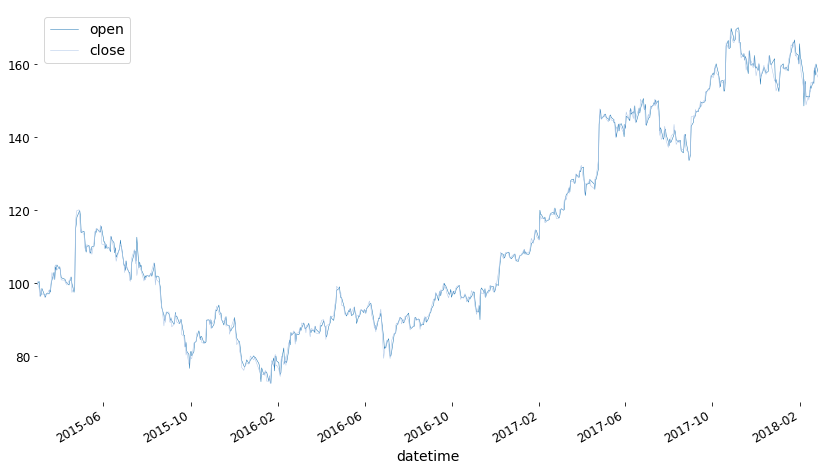

In [136]:
df[['open','close']].plot()
df.head()

In [137]:
# ADD FEATURES
df['X_volume'] = df['volume'].shift(1).copy()
df = df.pipe(feat.add_input_variables)
df = df.pipe(feat.add_rolling)
x_var = [x for x in np.unique(df.columns) if 'X_' in x]
df = df.pipe(feat.shift_columns, x_var, 10)

x_var = [x for x in np.unique(df.columns) if 'X_' in x]
# ADD OUTCOME
df = df.pipe(feat.add_outcome, days=10)
df.head()

,stock,open,high,low,close,volume,X_volume,X_close_open,X_open_open_days_1,X_open_open_day_1,X_low_high_days_1,X_low_high_day_1,X_open_open_days_2,X_open_open_day_2,X_low_high_days_2,X_low_high_day_2,X_open_open_days_3,X_open_open_day_3,X_low_high_days_3,X_low_high_day_3,X_open_open_days_4,X_open_open_day_4,X_low_high_days_4,X_low_high_day_4,X_open_open_days_5,...,X_volume_rolling_20_10,Y_low_high,Y_open_high,Y_open_close_days_0,Y_open_close_days_0_up,Y_open_close_days_1,Y_open_close_days_1_up,Y_open_close_days_2,Y_open_close_days_2_up,Y_open_close_days_3,Y_open_close_days_3_up,Y_open_close_days_4,Y_open_close_days_4_up,Y_open_close_days_5,Y_open_close_days_5_up,Y_open_close_days_6,Y_open_close_days_6_up,Y_open_close_days_7,Y_open_close_days_7_up,Y_open_close_days_8,Y_open_close_days_8_up,Y_open_close_days_9,Y_open_close_days_9_up,Y_open_close_days_10,Y_open_close_days_10_up
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-02-27 17:30:00,VOLV-B,99.60,100.8,99.50,100.60,6623353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.306533,1.204819,1.004016,1,-0.903614,-1,-3.212851,-1,-2.911647,-1,-1.054217,-1,-2.510040,-1,-2.811245,-1,-3.514056,-1,-2.610442,-1,-2.660643,-1,-2.710843,-1
2015-03-02 17:30:00,VOLV-B,100.50,101.5,97.85,98.70,6964231.0,6623353.0,-0.099404,0.903614,0.903614,1.306533,1.306533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.730199,0.995025,-1.791045,-1,-4.079602,-1,-3.781095,-1,-1.940299,-1,-3.383085,-1,-3.681592,-1,-4.378109,-1,-3.482587,-1,-3.532338,-1,-3.582090,-1,-2.388060,-1
2015-03-03 17:30:00,VOLV-B,98.55,99.0,96.25,96.40,7680292.0,6964231.0,-0.151976,-1.940299,-1.940299,3.730199,3.730199,-1.054217,0.903614,2.010050,1.306533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.857143,0.456621,-2.181634,-1,-1.877220,-1,0.000000,-1,-1.471334,-1,-1.775748,-1,-2.486048,-1,-1.572806,-1,-1.623541,-1,-1.674277,-1,-0.456621,-1,-1.116185,-1
2015-03-04 17:30:00,VOLV-B,96.40,97.3,95.10,96.70,7687822.0,7680292.0,0.000000,-2.181634,-2.181634,2.857143,2.857143,-4.079602,-1.940299,1.175268,3.730199,-3.212851,0.903614,-0.502513,1.306533,NaN,NaN,NaN,NaN,NaN,...,NaN,2.313354,0.933610,0.311203,1,2.230290,1,0.726141,1,0.414938,1,-0.311203,-1,0.622407,1,0.570539,1,0.518672,1,1.763485,1,1.089212,1,2.593361,1
2015-03-05 17:30:00,VOLV-B,96.95,99.2,96.85,98.55,7876065.0,7687822.0,0.258532,0.570539,0.570539,2.313354,2.313354,-1.623541,-2.181634,1.090909,2.857143,-3.532338,-1.940299,-0.562085,3.730199,-2.660643,0.903614,-2.211055,1.306533,NaN,...,NaN,2.426433,2.320784,1.650335,1,0.154719,1,-0.154719,-1,-0.876741,-1,0.051573,1,0.000000,-1,-0.051573,-1,1.186178,1,0.515730,1,2.011346,1,3.661681,1


In [138]:
df.iloc[200:210].T

datetime,2015-12-15 17:30:00,2015-12-16 17:30:00,2015-12-18 17:30:00,2015-12-21 17:30:00,2015-12-22 17:30:00,2015-12-23 17:30:00,2015-12-28 17:30:00,2015-12-29 17:30:00,2015-12-30 17:30:00,2016-01-04 17:30:00
stock,VOLV-B,VOLV-B,VOLV-B,VOLV-B,VOLV-B,VOLV-B,VOLV-B,VOLV-B,VOLV-B,VOLV-B
open,77,77.4,79,78,78.35,78.9,80.1,79.6,79.7,78
high,78.15,78.6,79.45,79.55,78.65,80.55,80.5,79.95,79.85,78.05
low,76.7,77.05,77.65,77.4,77.4,78.8,79,79.1,79.1,76.15
close,77.1,77.45,78,77.85,78.05,80.05,79,79.7,79.1,76.45
volume,9.43976e+06,8.8394e+06,9.35707e+06,6.05738e+06,5.1729e+06,5.28491e+06,3.72654e+06,3.94714e+06,4.94086e+06,7.39698e+06
X_volume,9.3353e+06,9.43976e+06,8.8394e+06,9.35707e+06,6.05738e+06,5.1729e+06,5.28491e+06,3.72654e+06,3.94714e+06,4.94086e+06
X_close_open,1.18265,0.389105,2.00129,0,0.642261,1.08905,0.062461,0.759494,0,-1.39064
X_open_open_days_1,-0.516796,0.519481,2.06718,-1.26582,0.448718,0.701978,1.52091,-0.62422,0.125628,-2.133
X_open_open_day_1,-0.516796,0.519481,2.06718,-1.26582,0.448718,0.701978,1.52091,-0.62422,0.125628,-2.133


In [139]:
x_var = [x for x in np.unique(df.columns) if 'X_' in x]
y_var = [x for x in np.unique(df.columns) if ('Y_' in x) & ('_up' in x)]
print(x_var)
print(y_var)

['X_close_open', 'X_close_open_1', 'X_close_open_10', 'X_close_open_2', 'X_close_open_3', 'X_close_open_4', 'X_close_open_5', 'X_close_open_6', 'X_close_open_7', 'X_close_open_8', 'X_close_open_9', 'X_low_high_day_1', 'X_low_high_day_10', 'X_low_high_day_10_1', 'X_low_high_day_10_10', 'X_low_high_day_10_2', 'X_low_high_day_10_3', 'X_low_high_day_10_4', 'X_low_high_day_10_5', 'X_low_high_day_10_6', 'X_low_high_day_10_7', 'X_low_high_day_10_8', 'X_low_high_day_10_9', 'X_low_high_day_1_1', 'X_low_high_day_1_10', 'X_low_high_day_1_2', 'X_low_high_day_1_3', 'X_low_high_day_1_4', 'X_low_high_day_1_5', 'X_low_high_day_1_6', 'X_low_high_day_1_7', 'X_low_high_day_1_8', 'X_low_high_day_1_9', 'X_low_high_day_2', 'X_low_high_day_2_1', 'X_low_high_day_2_10', 'X_low_high_day_2_2', 'X_low_high_day_2_3', 'X_low_high_day_2_4', 'X_low_high_day_2_5', 'X_low_high_day_2_6', 'X_low_high_day_2_7', 'X_low_high_day_2_8', 'X_low_high_day_2_9', 'X_low_high_day_3', 'X_low_high_day_3_1', 'X_low_high_day_3_10', 'X_

In [140]:
df.groupby(['Y_open_close_days_0_up'])['Y_open_close_days_0_up'].count()

Y_open_close_days_0_up
-1    379
 1    374
Name: Y_open_close_days_0_up, dtype: int64

In [300]:
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier

mla = RandomForestClassifier(criterion='entropy',
                            n_estimators=10,
                            random_state=1,
                            n_jobs=2)
mla = xgboost.XGBClassifier(max_depth=6, objective='binary:logistic')

#mla = Perceptron(max_iter=40, eta0=0.1, random_state=0)

#mla = GradientBoostingClassifier(max_depth=40)

In [303]:
from backtesting import BackTesting as bt
bt_volvo = bt(clf = mla, data = df)
pred_var = 'Y_open_close_days_'+str(10)+'_up'
bt_volvo.set_output_variable(pred_var)
bt_volvo

In [306]:
bt_volvo.get_result()

,actual,prediction
datetime,,
2015-02-27 17:30:00,-1,NaN
2015-03-02 17:30:00,-1,NaN
2015-03-03 17:30:00,-1,NaN
2015-03-04 17:30:00,1,NaN
2015-03-05 17:30:00,1,NaN
2015-03-06 17:30:00,1,NaN
2015-03-09 17:30:00,1,NaN
2015-03-10 17:30:00,1,NaN
2015-03-11 17:30:00,1,NaN


In [304]:
bt_volvo.run_backtest(start_row=300)

Days left: 452
Days left: 451
Days left: 450
Days left: 449
Days left: 448
Days left: 447
Days left: 446
Days left: 445
Days left: 444
Days left: 443
Days left: 442
Days left: 441
Days left: 440
Days left: 439
Days left: 438
Days left: 437
Days left: 436
Days left: 435
Days left: 434
Days left: 433
Days left: 432
Days left: 431
Days left: 430
Days left: 429
Days left: 428
Days left: 427
Days left: 426
Days left: 425
Days left: 424
Days left: 423
Days left: 422
Days left: 421
Days left: 420
Days left: 419
Days left: 418
Days left: 417
Days left: 416
Days left: 415
Days left: 414
Days left: 413
Days left: 412
Days left: 411
Days left: 410
Days left: 409
Days left: 408
Days left: 407
Days left: 406
Days left: 405
Days left: 404
Days left: 403
Days left: 402
Days left: 401
Days left: 400
Days left: 399
Days left: 398
Days left: 397
Days left: 396
Days left: 395
Days left: 394
Days left: 393
Days left: 392
Days left: 391
Days left: 390
Days left: 389
Days left: 388
Days left: 387
Days left:

In [102]:
# BACKTESTING
rows, cols = df.shape

start_pred_day = 100
pred_days = 0
pred_var = 'Y_open_close_days_'+str(pred_days)+'_up'
out_var = 'Y_open_close_days_'+str(pred_days)

d = {'prediction':np.nan,
     'actual':df[pred_var],
     'open':df['open'],
     'close':df['close'],
     out_var:df[out_var]}
index = df.index
df_result = pd.DataFrame(data=d,index=index)
df_result.tail()

failed_pred = 0
for pred_day in np.arange(start_pred_day+10,rows):
    index = df.index.values[pred_day]
    clear_output()
    print('Days left:',rows-pred_day)
    print('Day:',index)
    X_train = df[x_var].iloc[start_pred_day:pred_day,:]
    print('ML using',X_train.shape[0],'days and',X_train.shape[1],'variables')
    X_train = X_train.values
    Y_train = df[pred_var].iloc[start_pred_day:pred_day].values
    X_test = df[x_var].iloc[pred_day,:].values
    Y_test = df[pred_var].iloc[pred_day]
    df_result.set_value(index, 'actual', Y_test)
    
    mla.fit(X_train, Y_train)
    prediction = mla.predict_proba([X_test])
    #SAVE RESULT
    df_result.set_value(index, 'prediction', prediction[0][1])
#    except:
#        failed_pred += 1
#        df_result.set_value(index, 'prediction', 0)
#    if pred_day == 200:
#        break
print('done!')

Days left: 1
Day: 2018-02-23T17:30:00.000000000
ML using 653 days and 583 variables
done!


In [128]:
a = np.ones(100)
a
a[10] = 10
a

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,  10.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.])

In [125]:
#df[x_var].iloc[start_pred_day:pred_day,:].head(1).T
df_result.head()

,Y_open_close_days_10,actual,close,open,prediction,pred,accuracy,return
datetime,,,,,,,,
2015-08-06 17:30:00,-7.984421,-1,102.2,102.7,0.293915,-1,1.0,7.984421
2015-08-07 17:30:00,-7.998037,-1,103.5,101.9,0.136848,-1,1.0,7.998037
2015-08-10 17:30:00,-15.340364,-1,105.6,104.3,0.115614,-1,1.0,15.340364
2015-08-11 17:30:00,-13.412322,-1,103.0,105.5,0.096485,-1,1.0,13.412322
2015-08-12 17:30:00,-12.671233,-1,99.5,102.2,0.136698,-1,1.0,12.671233


In [104]:
def check_accuracy(df):
    accuracy = []
    for idx, row in df.iterrows():
        if (row['pred'] == row['actual']) and (row['pred']==1 or row['pred']==-1):  # Success
            accuracy = np.append(accuracy, 1)
        elif (row['pred']==0):  # No pred
            accuracy = np.append(accuracy, 0)
        elif (row['pred'] != row['actual']) and (row['pred']==1 or row['pred']==-1):  # Fail
            accuracy = np.append(accuracy, -1)
        else:
            accuracy = np.append(accuracy, np.nan)
    return accuracy

In [105]:
def set_prediction(pred):
    if pred >= 0.7:  # Long
        prediction = 1
    elif pred < 0.3:  # Short
        prediction = -1
    else:  # Stay
        prediction = 0
    return prediction

In [106]:
df_result = df_result.dropna()
df_result['pred'] = df_result['prediction'].apply(set_prediction)
df_result['actual'] = df_result['actual'].astype(int)
df_result['accuracy'] = df_result.pipe(check_accuracy)
df_result.head()

,Y_open_close_days_10,actual,close,open,prediction,pred,accuracy
datetime,,,,,,,
2015-08-06 17:30:00,-7.984421,-1,102.2,102.7,0.293915,-1,1.0
2015-08-07 17:30:00,-7.998037,-1,103.5,101.9,0.136848,-1,1.0
2015-08-10 17:30:00,-15.340364,-1,105.6,104.3,0.115614,-1,1.0
2015-08-11 17:30:00,-13.412322,-1,103.0,105.5,0.096485,-1,1.0
2015-08-12 17:30:00,-12.671233,-1,99.5,102.2,0.136698,-1,1.0


In [107]:
df_result['return'] = df_result[out_var].abs().mul(df_result['accuracy'])
df_result.head()

,Y_open_close_days_10,actual,close,open,prediction,pred,accuracy,return
datetime,,,,,,,,
2015-08-06 17:30:00,-7.984421,-1,102.2,102.7,0.293915,-1,1.0,7.984421
2015-08-07 17:30:00,-7.998037,-1,103.5,101.9,0.136848,-1,1.0,7.998037
2015-08-10 17:30:00,-15.340364,-1,105.6,104.3,0.115614,-1,1.0,15.340364
2015-08-11 17:30:00,-13.412322,-1,103.0,105.5,0.096485,-1,1.0,13.412322
2015-08-12 17:30:00,-12.671233,-1,99.5,102.2,0.136698,-1,1.0,12.671233


In [108]:
preds = df_result.groupby(['pred'])['pred'].count()
actual = df_result.groupby(['actual'])['actual'].count()

print('trades per week:',preds.loc[~0]/preds.sum()*5)
print(preds)
print(actual)

trades per week: 1.97949526814
pred
-1    251
 0    112
 1    271
Name: pred, dtype: int64
actual
-1    277
 1    357
Name: actual, dtype: int64


In [109]:
df_result = df_result.dropna()

In [110]:
df_result.groupby(['pred','actual'])['pred'].count().unstack()

actual,-1,1
pred,,
-1,184,67
0,46,66
1,47,224


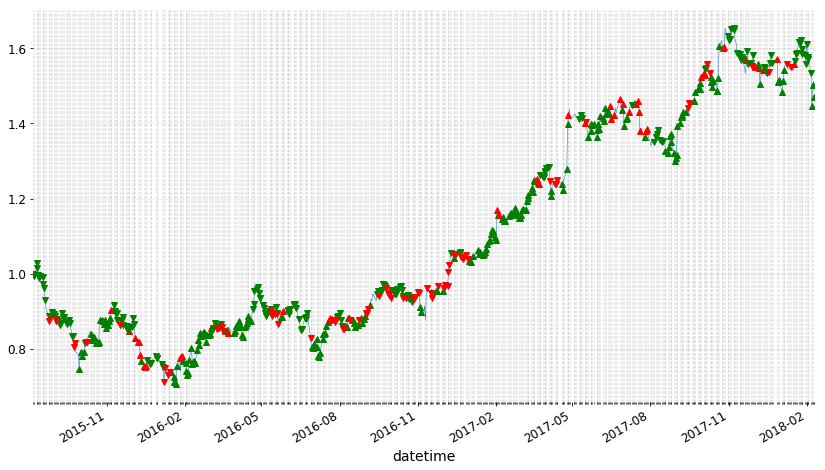

In [113]:
f, ax = plt.subplots()
start_date = pd.to_datetime('2010-03-01')
end_date = pd.to_datetime('2020-06-01')
result_slize = df_result[(df_result.index >= start_date) & (df_result.index < end_date)]
#df_result[['return', 'accuracy', 'Y_open_close_days_10']].cumsum().plot(ax=ax,legend=True)
start_val = result_slize['open'].iloc[0]
result_slize['open'].div(start_val).plot(ax=ax, secondary_y = False)
result_slize[(result_slize['pred']==1) & (result_slize['accuracy']==1)]['open'].div(start_val).plot(ax=ax, style='g^')
result_slize[(result_slize['pred']==1) & (result_slize['accuracy']==-1)]['open'].div(start_val).plot(ax=ax, style='r^')
result_slize[(result_slize['pred']==-1) & (result_slize['accuracy']==1)]['open'].div(start_val).plot(ax=ax, style='gv')
result_slize[(result_slize['pred']==-1) & (result_slize['accuracy']==-1)]['open'].div(start_val).plot(ax=ax, style='rv')
#df_result[df_result['pred']==-1]['open'].div(start_val).plot(ax=ax, style='ro')
#ax.axhline(0, ls= '--',c='r')
xtick = result_slize.index
ax.set_xticks( xtick, minor=True )
ax.grid('on', which='minor', axis='x' )
ax.grid('on', which='major', axis='y' )

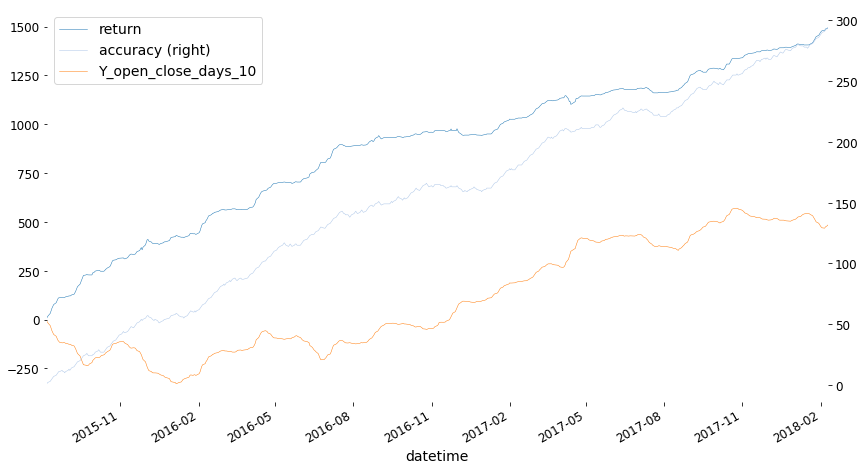

In [116]:
f, ax = plt.subplots()
df_result[['return', 'accuracy', 'Y_open_close_days_10']].cumsum().plot(ax=ax,legend=True, secondary_y = 'accuracy')

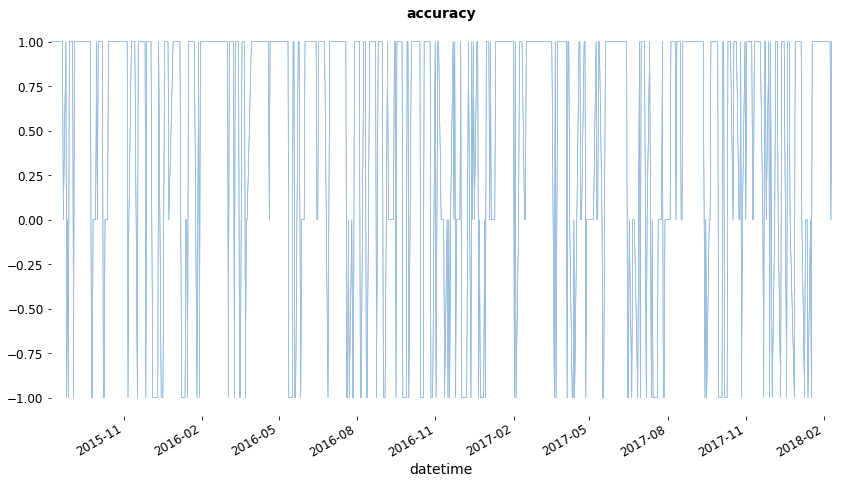

In [120]:
ax = df_result['accuracy'].plot()
df_result['accuracy'].plot(ax=ax, title='accuracy')
#df_result['pred'].plot(ax=ax)

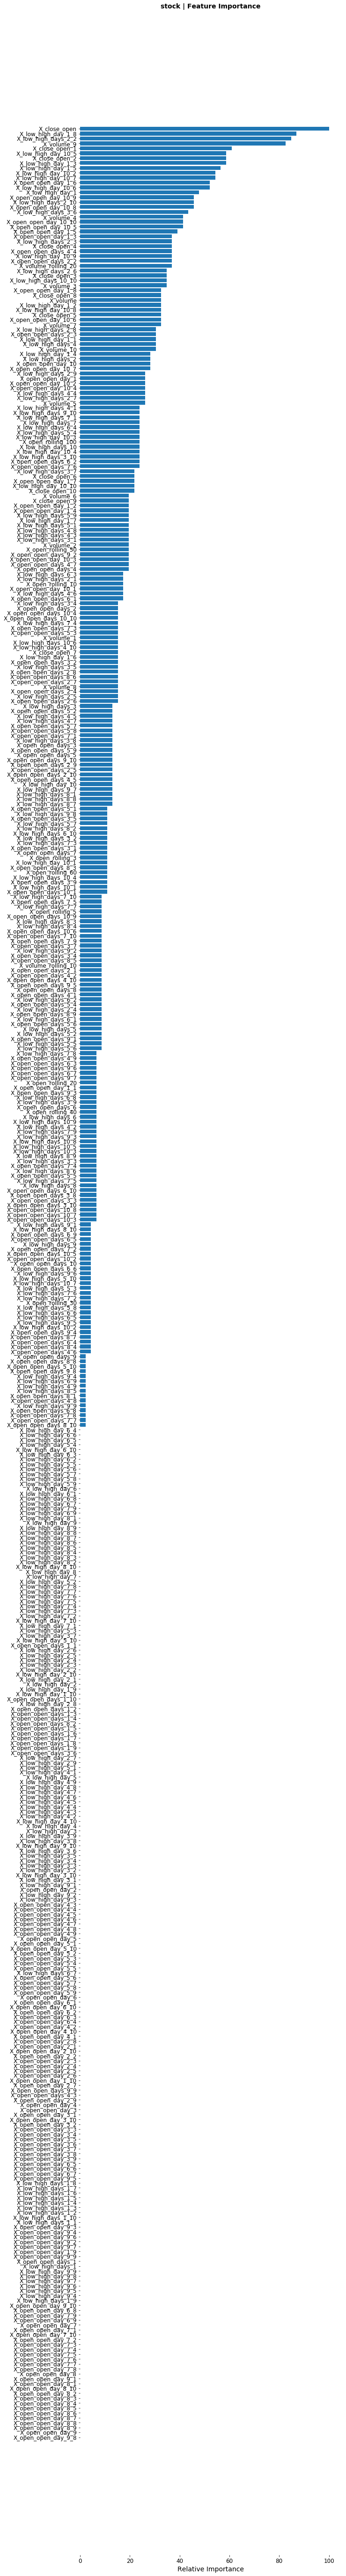

In [93]:
import plot as pl
pl.feature_importance(mla, x_var, 'stock', (10,100))

In [345]:
import 

Y_open_close_days_0           inf
actual                   1.000000
close                  179.600000
open                     0.000000
prediction               0.780766
pred                     1.000000
accuracy                 1.000000
return                        inf
Name: 2017-09-19 17:30:00, dtype: float64